<a href="https://colab.research.google.com/github/khaledeldifrawy/Ara-Sentiment-Analysis/blob/main/ara_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install camel-tools
!pip install -U transformers

In [ ]:
import pandas as pd
import numpy as np
import re
from camel_tools.utils.dediac import dediac_ar
from camel_tools.utils.normalize import (
    normalize_alef_maksura_ar,
    normalize_teh_marbuta_ar,
    normalize_alef_ar
)
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Arabic/EESA-Train.csv')

In [ ]:
data.head()

,text,sentiment
0,*أنسّى الألمَ ؟ أنها مجرد حياهَ ولن تدوّم ..* ...,neutral
1,الحراميه اللي سارقه الموسيقي من اغنيه فنانه كو...,negative
2,مش عارف ليه حاس اني داخل pupge 😂😂😂,neutral
3,500 مليون ههههههه والله العظيم ماتستاهل حتى 50...,negative
4,جميل الاعلان وشكرا شركة wE 🤗💓,positive


In [ ]:
def clean_arabic_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www.\S+", "", text)

    # Replace digits with a token
    text = re.sub(r'\d+', ' [رقم] ', text)

    # Remove mentions, hashtags
    text = re.sub(r"@\w+|#\w+", "", text)

    # Remove all English words completely
    text = re.sub(r'\b[A-Za-z]+\b', '', text)

    # Remove Arabic diacritics and tatweel
    text = re.sub(r"[ًٌٍَُِّْـ]", "", text)

    # Normalize Arabic letters
    text = re.sub(r"[إأآا]", "ا", text)
    text = re.sub(r"ى", "ي", text)
    text = re.sub(r"ؤ", "و", text)
    text = re.sub(r"ئ", "ي", text)
    text = re.sub(r"ة", "ه", text)

    # Remove elongated letters (e.g., حلوووو → حلو)
    text = re.sub(r"(.)\1{2,}", r"\1", text)

    # Remove punctuation and non-Arabic characters
    text = re.sub(r"[^\w\s\[\]]", "", text)
    text = re.sub(r"[^\u0600-\u06FF\s\[\]]", "", text)

    # Normalize spaces
    text = re.sub(r"\s+", " ", text).strip()

    # Apply camel-tools normalization
    text = dediac_ar(text)
    text = normalize_alef_ar(text)
    text = normalize_teh_marbuta_ar(text)
    text = normalize_alef_maksura_ar(text)

    return text

In [ ]:
data['cleanedText']=data['text'].apply(clean_arabic_text)

In [ ]:
data.head(10)

,text,sentiment,cleanedText
0,*أنسّى الألمَ ؟ أنها مجرد حياهَ ولن تدوّم ..* ...,neutral,انسي الالم انها مجرد حياه ولن تدوم
1,الحراميه اللي سارقه الموسيقي من اغنيه فنانه كو...,negative,الحراميه اللي سارقه الموسيقي من اغنيه فنانه كو...
2,مش عارف ليه حاس اني داخل pupge 😂😂😂,neutral,مش عارف ليه حاس اني داخل
3,500 مليون ههههههه والله العظيم ماتستاهل حتى 50...,negative,[رقم] مليون ه والله العظيم ماتستاهل حتي [رقم]
4,جميل الاعلان وشكرا شركة wE 🤗💓,positive,جميل الاعلان وشكرا شركه
5,كريم عبد العزيز : هايدي موسى؟! ستار اكاديمي؟ ا...,positive,كريم عبد العزيز هايدي موسي ستار اكاديمي الله د...
6,لقاء rap or die واحمد كامل,neutral,لقاء واحمد كامل
7,العيال الكتيانه ابتوع الصفح عاملين dislike :D,negative,العيال الكتيانه ابتوع الصفح عاملين
8,من طرف BIG 💜💜💜💜💜💜,positive,من طرف
9,اموت واعرف مين ولاد المره اللي عاملين dislike ...,negative,اموت واعرف مين ولاد المره اللي عاملين


In [ ]:
print(data['sentiment'].value_counts())  # Label distribution


sentiment
positive    1092
neutral      778
negative     593
Name: count, dtype: int64


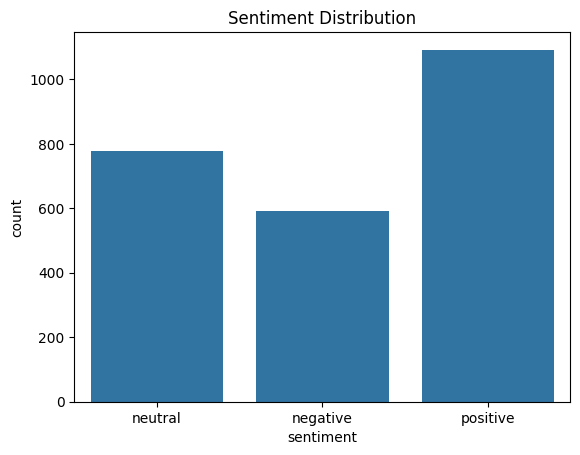

In [ ]:
sns.countplot(data=data, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
sampled_pos=data[data['sentiment']=="positive"].sample(593)
sampled_neg=data[data['sentiment']=="negative"].sample(593)
sampled_neu=data[data['sentiment']=="neutral"].sample(593)

In [ ]:
sampled_data=pd.concat([sampled_pos,sampled_neg,sampled_neu])
sampled_data.head()

,text,sentiment,cleanedText
934,الله الله على مصر ام الدنيا انا مفتخر اني مصري...,positive,الله الله علي مصر ام الدنيا انا مفتخر اني مصري...
2211,مين اجا بعد big 💙💙💙,positive,مين اجا بعد
1414,مااجمل الحب يا عيني\nLove yoo,positive,مااجمل الحب يا عيني
1753,إهداء خاص للفنان الكبير كريم عبد العزيز وامير ...,positive,اهداء خاص للفنان الكبير كريم عبد العزيز وامير ...
1781,لمة رمضان حلوة معاكو. liove orang@,positive,لمه رمضان حلوه معاكو


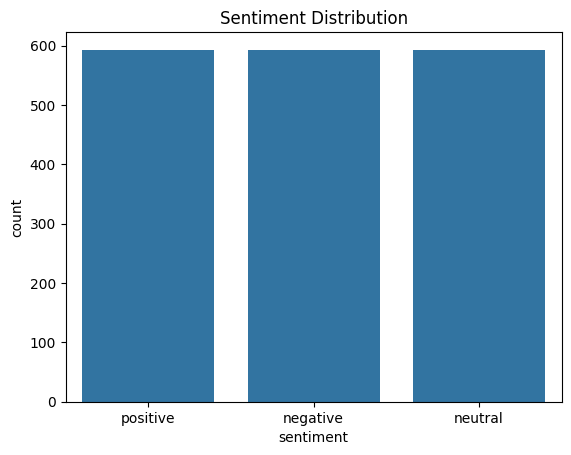

In [ ]:
sns.countplot(data=sampled_data, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
sampled_data.to_csv('/content/drive/MyDrive/Arabic/balanced_data.csv',index=False)

In [ ]:
MODEL_NAME = "asafaya/bert-base-arabic"  # أو أي موديل تاني مناسب

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# مثال لتحويل النصوص إلى input IDs و attention masks
def tokenize_function(examples):
    return tokenizer(examples['cleanedText'], truncation=True, padding=True)

# لو شغال بـ pandas:
from datasets import Dataset

hf_dataset = Dataset.from_pandas(sampled_data[['cleanedText', 'sentiment']])
hf_dataset = hf_dataset.map(tokenize_function, batched=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/1779 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
sampled_data['label'] = label_encoder.fit_transform(sampled_data['sentiment'])

# استخدم df['label'] بدل sentiment
hf_dataset = Dataset.from_pandas(sampled_data[['cleanedText', 'label']])
hf_dataset = hf_dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/1779 [00:00<?, ? examples/s]

In [ ]:
hf_dataset = hf_dataset.train_test_split(test_size=0.2)


In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=3  # حسب عدد الفئات عندك: 3 لـ (positive, negative, neutral)
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments, Trainer, DataCollatorWithPadding

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",  # Changed save_strategy to match eval_strategy
    learning_rate=2e-5,                    # معدل تعلّم مناسب لنماذج BERT
    per_device_train_batch_size=16,        # حسب VRAM: جرب 32 أو 16
    per_device_eval_batch_size=32,         # أكبر شوية لتسريع التقييم
    num_train_epochs=3,                    # كبداية. ممكن تزود لو الأداء مش جيد
    weight_decay=0.01,                     # تقليل الـ overfitting
    load_best_model_at_end=True,           # تحميل أفضل نموذج (على التقييم)
    metric_for_best_model="f1",            # لو هتستخدم F1 كمقياس أساسي
    logging_dir="./logs",                  # مجلد تسجيل النتائج
    logging_steps=50,                      # كل كام خطوة يسجّل
    save_total_limit=2,                    # يحتفظ بآخر 2 نموذج فقط
    fp16=True,                             # استخدام نصف الدقة (لو فيه GPU)
    report_to="none",
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=hf_dataset['train'],
    eval_dataset=hf_dataset['test'],
    tokenizer=tokenizer,
    data_collator=data_collator,
)

/tmp/ipython-input-3628974707.py:23: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# Define a compute_metrics function
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Re-initialize TrainingArguments to include metric_for_best_model if not already there
# Make sure metric_for_best_model is set to 'f1'
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1", # Ensure this is set to 'f1'
    logging_dir="./logs",
    logging_steps=50,
    save_total_limit=2,
    fp16=True,
    report_to="none",
)

# Assuming model and hf_dataset are already defined from previous cells
# Assuming tokenizer is already defined

# Re-initialize Trainer with the compute_metrics function
trainer = Trainer(
    model=model, # Assuming model is already loaded and initialized
    args=training_args,
    train_dataset=hf_dataset['train'],
    eval_dataset=hf_dataset['test'],
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer), # Add data collator
    compute_metrics=compute_metrics, # Add compute_metrics function
)

trainer.train()
trainer.evaluate()
trainer.save_model("/content/drive/MyDrive/Arabic/results")
model.save_pretrained("arabic_sentiment_model")
tokenizer.save_pretrained("arabic_sentiment_model")

/tmp/ipython-input-1620742313.py:43: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.051200,2.105350,0.758427,0.756231,0.787041,0.758427
2,0.038700,1.681111,0.797753,0.796314,0.801358,0.797753
3,0.037000,1.633218,0.803371,0.802926,0.803449,0.803371


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


('arabic_sentiment_model/tokenizer_config.json',
 'arabic_sentiment_model/special_tokens_map.json',
 'arabic_sentiment_model/vocab.txt',
 'arabic_sentiment_model/added_tokens.json',
 'arabic_sentiment_model/tokenizer.json')

In [ ]:
from transformers import pipeline
import torch

def predict_sentiment(text, model, tokenizer):
    cleaned_text = clean_arabic_text(text)  # Your cleaning function
    inputs = tokenizer(cleaned_text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_id = torch.argmax(logits, dim=1).item()
    id2label = {0: "negative", 1: "neutral", 2: "positive"}
    return id2label[predicted_class_id]



In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load your fine-tuned model
model_path = "/content/drive/MyDrive/Arabic/results"  # e.g., "saved_model" or checkpoint
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Predict
text = "لتحميل الاغنية hd فيديو و صوت دوس علي اللينك ده http://activeation.com/3OHs و بعدين استني خمسي ثواني و دوس skip ad و بعدين دوس download"
sentiment = predict_sentiment(text, model, tokenizer)
print(sentiment)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


neutral
